# Intiializing

In [82]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# preping datasets for concatenation
# concatenating so we can handle nulls for both and make sure they have similar variables.

training['train_test'] = 1 # adding variable train_test to differentiate train vs test data
test['train_test'] = 0 # adding variable train_test to differentiate train vs test data
test['Survived'] = np.NaN # adding and variable Survived to test data

all_data = pd.concat([training,test]) # concatenating train and test for all_data


# Understanding

In [4]:
# casting integer types as objects
training = training.astype({'Pclass':'object',
                'Survived': 'object',
                'PassengerId':'object'},)
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null object
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
train_test     891 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 90.6+ KB


## Numerical Data

In [5]:
# creating df with only numeric values and exploring
df_num = training[list(training.describe(include = np.number).drop(columns= ['train_test'], axis=1).columns)]
df_num.describe()


Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

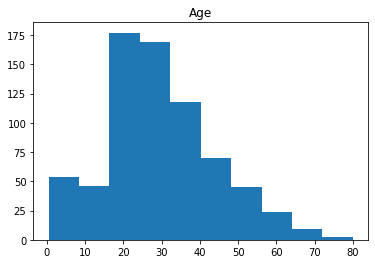

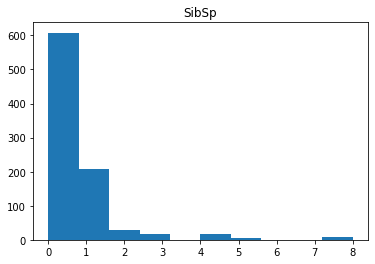

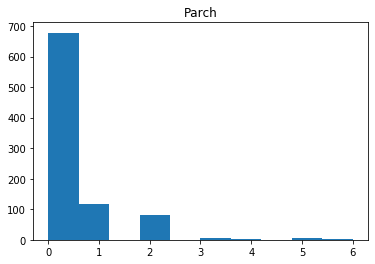

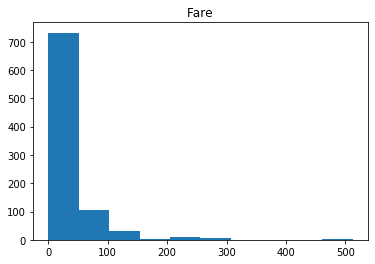

In [6]:
#distributions for all numeric variables 
for column in df_num.columns:
    plt.hist(df_num[column])
    plt.title(column)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


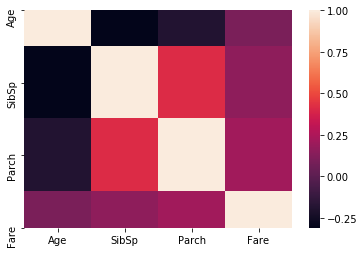

In [7]:
# compare correlationns between numerical values
print(df_num.corr())
sns.heatmap(df_num.corr())

In [8]:
# compare survival rate across numerical values Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = df_num.columns)

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

## Categorical Data

In [9]:
# creating df with only numeric values and exploring
df_cat = training[list(training.describe(exclude= np.number).drop(columns=['Name','PassengerId'],axis=1).columns)]
df_cat.describe()

Survived  Pclass   Sex    Ticket Cabin Embarked
count        891     891   891       891   204      889
unique         2       3     2       681   147        3
top            0       3  male  CA. 2343    G6        S
freq         549     491   577         7     4      644

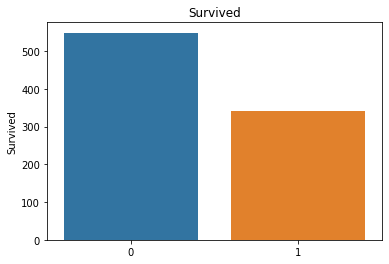

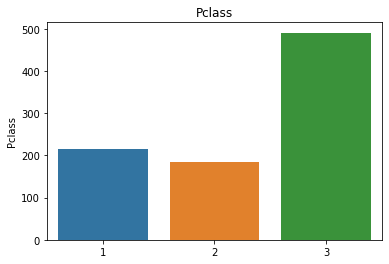

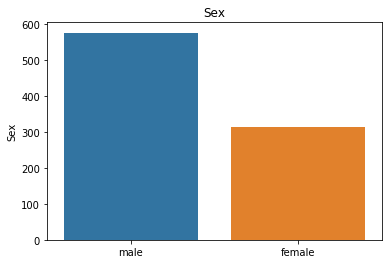

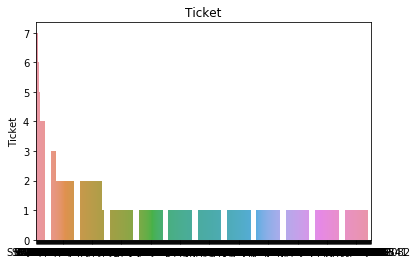

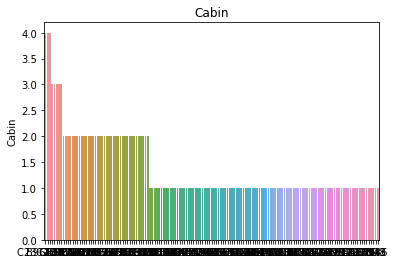

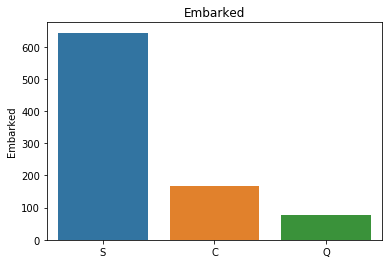

In [10]:
#distributions for all categorical variables 
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [11]:
# Comparing survival and each of these categorical variables
training['cabin_multiple'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_adv'] = training['Cabin'].apply(lambda x: str(x)[0])


for name in ['Sex','Embarked', 'Pclass','cabin_multiple','cabin_adv']:
    print(pd.pivot_table(training, index = 'Survived', columns = name, values = 'Ticket' ,aggfunc 
='count'), end='\n\n')
    

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0



# Preprocessing

In [12]:
def fillndrop(df,x,parameter,manual=None):
    """input is a list of column title, and if you want the mean, mode, or drop. 
    After replacing columns with nulls, function will drop remaining values
    """
    if parameter == 'mode':
        for i in x:
            df[i] = df[i].fillna(df[i].mode()[0])
    if parameter == 'mean':
        for i in x:
            df[i] = df[i].fillna(df[i].mean())
    if parameter == 'median':
        for i in x:
            df[i] = df[i].fillna(df[i].median())
    if parameter == 'drop':
        for i in x:
            if i not in df:
                break
            else:
                df.drop(i,axis=1,inplace=True)
    if parameter == 'manual':
        for i in x:
            df[i] = df[i].fillna(manual)

## Nulls

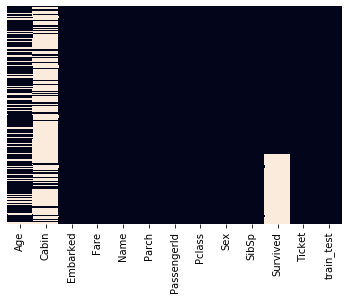

In [13]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)
plt.show()

In [14]:
nulls = all_data.isnull().sum().sort_values(ascending=False).to_frame()
nulls

0
Cabin        1014
Survived      418
Age           263
Embarked        2
Fare            1
train_test      0
Ticket          0
SibSp           0
Sex             0
Pclass          0
PassengerId     0
Parch           0
Name            0

In [15]:
#imputing nulls
fillndrop(all_data,['Age','Fare','Embarked'],'mode')

## Processing

In [16]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

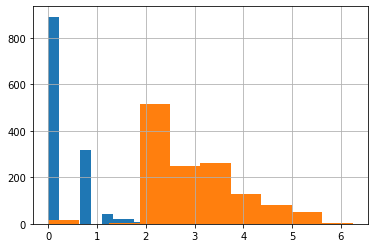

In [17]:
# log norm of sibsp
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare because was fare was skewed with many lowe fare prices
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

## Dummies

In [18]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

## Split X_train, y_train, and X_test

In [19]:
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

# Intiate y_train
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(891,)

## Scale Data

### Why and Where to Apply Feature Scaling?
Real world dataset contains features that highly vary in magnitudes, units, and range. Normalisation should be performed when the scale of a feature is irrelevant or misleading and not should Normalise when the scale is meaningful.

The algorithms which use Euclidean Distance measure are sensitive to Magnitudes. Here feature scaling helps to weigh all the features equally.

Formally, If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.

Examples of Algorithms where Feature Scaling matters
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required.
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.
In Short, any Algorithm which is Not Distance based is Not affected by Feature Scaling.

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

# Building Models

### Model Building (Baseline Validation Performance)
Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

- Naive Bayes 
- Logistic Regression 
- Decision Tree 
- K Nearest Neighbor 
- Random Forest 
- Support Vector Classifier 
- Xtreme Gradient Boosting 
- Soft Voting Classifier - All Models

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


models = pd.DataFrame({'model':['gnb','lr','dt','knn','rf','svc','xgb','v_clf']
,'baseline':0.0,'baseline_scaled':0.0,'tuned':0.0,'tuned_scaled':0.0}).set_index('model')
# suffix _s is for scaled
models

baseline  baseline_scaled  tuned  tuned_scaled
model                                                
gnb         0.0              0.0    0.0           0.0
lr          0.0              0.0    0.0           0.0
dt          0.0              0.0    0.0           0.0
knn         0.0              0.0    0.0           0.0
rf          0.0              0.0    0.0           0.0
svc         0.0              0.0    0.0           0.0
xgb         0.0              0.0    0.0           0.0
v_clf       0.0              0.0    0.0           0.0

In [119]:
gnb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = tree.DecisionTreeClassifier(random_state = 1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state =1)

# Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
v_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 


m = [gnb, lr, dt, knn, rf, svc, xgb, v_clf]

In [115]:
# Wanted to save time and created a for loop that called different models, ran model on both scaled and unscaled X and then updated results to dataframe
for i in range(len(m)):
    m[i]
    models.iat[i,0] = cross_val_score(m[i],X_train,y_train,cv=5).mean()
    models.iat[i,1] = cross_val_score(m[i],X_train_scaled,y_train,cv=5).mean()

[17:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [116]:
models

baseline  baseline_scaled  tuned  tuned_scaled
model                                                
gnb    0.727377         0.721778    0.0           0.0
lr     0.817116         0.819363    0.0           0.0
dt     0.790142         0.789019    0.0           0.0
knn    0.810386         0.819388    0.0           0.0
rf     0.793488         0.793488    0.0           0.0
svc    0.812577         0.830542    0.0           0.0
xgb    0.827178         0.827178    0.0           0.0
v_clf  0.837303         0.847390    0.0           0.0

In [117]:
v_clf.fit(X_train_scaled,y_train)
y_pred = v_clf.predict(X_test_scaled).astype(int)


[17:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
#pd.concat() axis=1 concats columns together
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('submission_02.csv',index=False)